In [1]:
# Install BiocManager if not already installed
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

# Install required Bioconductor packages (5min 22.7s)
BiocManager::install(c("clusterProfiler", "org.Sc.sgd.db", "enrichplot"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'clusterProfiler', 'org.Sc.sgd.db', 'enrichplot'

also installing the dependencies 'plogr', 'png', 'Biostrings', 'cowplot', 'fastmatch', 'gridGraphics', 'tweenr', 'polyclip', 'RSQLite', 'KEGGREST', 'fgsea', 'ggplotify', 'patchwork', 'ggforce', 'ape', 'tidytree', 'treeio', 'AnnotationDbi', 'DOSE', 'GO.db', 'GOSemSim', 'gson', 'igraph', 'qvalue', 'yulab.utils', 'aplot', 'ggfun', 'ggnewscale', 'ggtangle', 'scatterpie', 'ggtree'





  There is a binary version available but the source version is later:
      binary source needs_compilation
fgsea 1.32.0 1.32.2              TRUE


The downloaded binary packages are in
	/var/folders/y2/hzjfncr92llg100m08nwxmhc0000gn/T//RtmpHmtS8v/downloaded_packages


installing the source packages 'fgsea', 'GO.db', 'org.Sc.sgd.db'


Old packages: 'KernSmooth', 'MASS', 'class', 'cluster', 'nnet', 'spatial',
  'survival'



In [2]:
# Load the libraries
library(clusterProfiler)
library(org.Sc.sgd.db)
library(enrichplot)
library(ggplot2)
library(tidyverse)



clusterProfiler v4.14.4 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

S Xu, E Hu, Y Cai, Z Xie, X Luo, L Zhan, W Tang, Q Wang, B Liu, R Wang,
W Xie, T Wu, L Xie, G Yu. Using clusterProfiler to characterize
multiomics data. Nature Protocols. 2024, doi:10.1038/s41596-024-01020-z


Attaching package: 'clusterProfiler'


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmi

# Define Thresholds

In [4]:
# Load the data - Table of significant genes
res_tbl <- read.csv("data/E_vs_C_all_genes.csv")
dim(res_tbl)
head(res_tbl)

[1] 6134    6

,gene,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,YMR174C,4392.762,5.504908,0.1840782,1.088750e-197,6.664236e-194
2,YBR072W,30053.806,6.516708,0.2295216,4.279000e-178,1.309588e-174
3,YBR117C,7641.370,7.430477,0.2699041,5.023902e-168,1.025043e-164
4,YGR256W,7219.422,6.772904,0.2830174,1.177464e-127,1.801814e-124
5,YMR175W,8530.858,7.518518,0.3353447,1.299220e-112,1.590506e-109
6,YGL121C,4733.685,4.326446,0.1952246,6.559172e-110,6.691449e-107


In [5]:
# Gene names to row names
rownames(res_tbl) <- res_tbl$gene

# Re-order by padj
res_tbl_ordered <- res_tbl[order(res_tbl$padj), ]
head(res_tbl_ordered)

,gene,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YMR174C,YMR174C,4392.762,5.504908,0.1840782,1.088750e-197,6.664236e-194
YBR072W,YBR072W,30053.806,6.516708,0.2295216,4.279000e-178,1.309588e-174
YBR117C,YBR117C,7641.370,7.430477,0.2699041,5.023902e-168,1.025043e-164
YGR256W,YGR256W,7219.422,6.772904,0.2830174,1.177464e-127,1.801814e-124
YMR175W,YMR175W,8530.858,7.518518,0.3353447,1.299220e-112,1.590506e-109
YGL121C,YGL121C,4733.685,4.326446,0.1952246,6.559172e-110,6.691449e-107


In [ ]:
# check genes have zero expression
res_tbl_ordered[which(res_tbl_ordered$baseMean == 0), ] |> data.frame()

gene,baseMean,log2FoldChange,lfcSE,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [8]:
# Define thresholds
padj_threshold <- 0.05
log2fc_threshold <- 2

# Filter the table
cond_1 <- res_tbl_ordered$padj < padj_threshold
cond_2 <- abs(res_tbl_ordered$log2FoldChange) > log2fc_threshold
deg_genes <- res_tbl_ordered[which(cond_1 & abs(cond_2)), ]
dim(deg_genes)
head(deg_genes)

[1] 506   6

,gene,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
YMR174C,YMR174C,4392.762,5.504908,0.1840782,1.088750e-197,6.664236e-194
YBR072W,YBR072W,30053.806,6.516708,0.2295216,4.279000e-178,1.309588e-174
YBR117C,YBR117C,7641.370,7.430477,0.2699041,5.023902e-168,1.025043e-164
YGR256W,YGR256W,7219.422,6.772904,0.2830174,1.177464e-127,1.801814e-124
YMR175W,YMR175W,8530.858,7.518518,0.3353447,1.299220e-112,1.590506e-109
YGL121C,YGL121C,4733.685,4.326446,0.1952246,6.559172e-110,6.691449e-107


In [9]:
# Extract gene identifiers (assuming row names are SGD IDs)
deg_gene_list <- rownames(deg_genes)
deg_gene_list |> length()
head(deg_gene_list, 20)

[1] 506

[1] "YMR174C"   "YBR072W"   "YBR117C"   "YGR256W"   "YMR175W"   "YGL121C"  
 [7] "YPL223C"   "YKR076W"   "YMR175W-A" "YKR049C"   "YIL136W"   "YMR090W"  
[13] "YBL075C"   "YOR120W"   "YML042W"   "YDL130W-A" "YGL156W"   "YDL085W"  
[19] "YDL169C"   "YBL002W"

# Prepare Up and Down Regulated Gene List

In [10]:
# Upregulated genes
cond_up_1 <- res_tbl_ordered$padj < padj_threshold
cond_up_2 <- res_tbl_ordered$log2FoldChange > log2fc_threshold
up_genes <- res_tbl_ordered[which(cond_up_1 & cond_up_2), ]
up_gene_list <- rownames(up_genes)
head(up_gene_list, 10)

# Downregulated genes
cond_down_1 <- res_tbl_ordered$padj < padj_threshold
cond_down_2 <- res_tbl_ordered$log2FoldChange < -log2fc_threshold
down_genes <- res_tbl_ordered[which(cond_down_1 & cond_down_2), ]
down_gene_list <- rownames(down_genes)
head(down_gene_list, 10)

[1] "YMR174C"   "YBR072W"   "YBR117C"   "YGR256W"   "YMR175W"   "YGL121C"  
 [7] "YPL223C"   "YKR076W"   "YMR175W-A" "YKR049C"

[1] "YBL002W" "YEL040W" "YJL200C" "YHR216W" "YOR222W" "YPL265W" "YBR145W"
 [8] "YNL169C" "YLR333C" "YER026C"

In [11]:
up_gene_list |> length()
down_gene_list |> length()

[1] 250

[1] 256

# Perform the Over-Represented Analysis

## Enrichment of Up Regulated Genes

#### **1. What is GO enrichment analysis?**
GO enrichment analysis identifies overrepresented GO terms (e.g., biological processes, molecular functions, or cellular components) in a given list of genes compared to a background (all genes). It helps determine the biological roles of the genes of interest.

#### **2. Key Function: `enrichGO()`**
The `enrichGO()` function comes from the `clusterProfiler` R package and is used for GO enrichment analysis.

#### **3. Parameters Explained**
- **`gene`**: 
  - The list of genes of interest for enrichment analysis.
  - In this case, `up_gene_list` contains genes that are upregulated in the analysis (e.g., differentially expressed genes).
  - These are provided in the SGD (Saccharomyces Genome Database) **ORF IDs** (e.g., `YMR174C`).

- **`OrgDb`**: 
  - The annotation database for the organism. 
  - Here, `org.Sc.sgd.db` is the **OrgDb object** for *Saccharomyces cerevisiae* (baker's yeast).
  - This database contains mappings of gene IDs to GO terms, annotations, and other metadata.

- **`keyType`**:
  - Specifies the type of gene identifiers being used.
  - `"ORF"` indicates Open Reading Frame identifiers, such as `YMR174C`.

- **`ont`**:
  - The GO ontology to analyze:
    - `"BP"`: Biological Process.
    - Other options: `"MF"` (Molecular Function), `"CC"` (Cellular Component).
  - Here, it's analyzing biological processes.

- **`pAdjustMethod`**:
  - The method used for correcting **p-values** for multiple hypothesis testing.
  - `"BH"` refers to the **Benjamini-Hochberg** procedure, a widely used method to control the false discovery rate (FDR).

- **`pvalueCutoff`**:
  - Only GO terms with p-values below this threshold are considered significant.
  - Here, the cutoff is `0.05` (5%).

- **`qvalueCutoff`**:
  - A cutoff for the **q-value**, which is an adjusted version of the p-value.
  - GO terms with q-values below `0.2` (20%) are considered.

In [12]:
# Perform GO enrichment analysis for Biological Processes
ego_bp_up <- enrichGO(
    gene          = up_gene_list,      # Your DEG list in SGD ORF IDs
    OrgDb         = org.Sc.sgd.db,      # OrgDb for S. cerevisiae
    keyType       = "ORF",              # Key type of gene identifiers
    ont           = "BP",               # Ontology: BP (Biological Process)
    pAdjustMethod = "BH",               # Multiple testing correction
    pvalueCutoff  = 0.05,               # P-value cutoff
    qvalueCutoff  = 0.2                 # Q-value cutoff
)

In [16]:
dim(ego_bp_up)
head(ego_bp_up)  # View the top results

[1] 63 12

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0016052,GO:0016052,carbohydrate catabolic process,23/238,112/6476,0.2053571,5.587785,9.566051,8.859134e-12,6.856970e-09,5.856354e-09,YGR256W/YOR120W/YGL156W/YJR096W/YPR184W/YHR104W/YDL021W/YPR026W/YDR001C/YBR001C/YML070W/YIL099W/YFR053C/YPR160W/YIL155C/YIL162W/YLR070C/YCL040W/YMR105C/YFR017C/YGR292W/YBR299W/YJR159W,23
GO:0044282,GO:0044282,small molecule catabolic process,25/238,145/6476,0.1724138,4.691394,8.780594,6.069770e-11,2.349001e-08,2.006219e-08,YGR256W/YOR120W/YGL156W/YJR096W/YHR104W/YOR391C/YIL160C/YMR250W/YML070W/YNL274C/YPR127W/YPL280W/YOR388C/YNL202W/YJR019C/YGR087C/YIL155C/YLR070C/YDR533C/YGL205W/YJR078W/YMR105C/YPL275W/YPL276W/YJR159W,25
GO:0005975,GO:0005975,carbohydrate metabolic process,34/238,277/6476,0.1227437,3.339866,7.774200,3.099557e-10,7.996858e-08,6.829902e-08,YGR256W/YOR120W/YGL156W/YDL085W/YGR043C/YJR096W/YPR184W/YHR104W/YDL021W/YPR026W/YDR001C/YBR001C/YMR196W/YML070W/YEL070W/YIL107C/YDR009W/YIL099W/YMR280C/YFR053C/YER054C/YPR160W/YIL155C/YIL162W/YLR070C/YCL040W/YGR248W/YLR174W/YMR105C/YFR017C/YGR292W/YBR299W/YJR159W/YML100W,34
GO:0032787,GO:0032787,monocarboxylic acid metabolic process,25/238,170/6476,0.1470588,4.001483,7.745849,2.010853e-09,3.891001e-07,3.323199e-07,YGR256W/YML042W/YMR169C/YDL110C/YBR026C/YOR391C/YDL021W/YIL160C/YOL002C/YMR170C/YNL274C/YBL015W/YPL280W/YFR053C/YOR388C/YGL055W/YNL202W/YJR019C/YOR374W/YDR533C/YGL205W/YCL040W/YLR174W/YPL275W/YPL276W,25
GO:0006091,GO:0006091,generation of precursor metabolites and energy,25/238,217/6476,0.1152074,3.134802,6.247708,2.930343e-07,4.536170e-05,3.874221e-05,YBR117C/YGR256W/YDL085W/YJL045W/YGR043C/YPR184W/YBR026C/YKL093W/YDL021W/YML070W/YOL071W/YMR118C/YIL099W/YFR053C/YER054C/YGL055W/YOR374W/YPR160W/YIL057C/YCL040W/YGR248W/YLR174W/YMR105C/YFR017C/YLR164W,25
GO:0006979,GO:0006979,response to oxidative stress,16/238,103/6476,0.1553398,4.226809,6.447712,8.643298e-07,9.716547e-05,8.298642e-05,YOR120W/YKL026C/YGR043C/YBL064C/YJR096W/YHR104W/YDR453C/YFL014W/YMR250W/YCL035C/YCR083W/YNL036W/YOL052C-A/YGR088W/YDR533C/YKL086W,16


- ID: Gene Ontology term identifier (GO:XXXXXXX)

- Description: Brief description of the biological process

- GeneRatio: Ratio of genes in your input list belonging to that GO term (e.g., 34/238 means 34 genes out of 238 total input genes)

- BgRatio: Background ratio of genes for that GO term in the entire genome (e.g., 277/6476 means 277 genes out of 6476 total genome)

- RichFactor: Ratio between the gene proportion in your list vs. background (GeneRatio/BgRatio)

- FoldEnrichment: How many times more frequent the term is in your list compared to expected by chance

- zScore: Statistical measure of enrichment strength

- pvalue: Raw statistical significance

- p.adjust: P-value adjusted for multiple testing using BH method

- qvalue: False discovery rate analog of p-value, used for significance threshold

- Your code shows enrichment analysis for upregulated genes (up_gene_list) in yeast (S. cerevisiae), focusing on biological processes with adjusted p-value < 0.05 and q-value < 0.2.

In [17]:
# Sorting by Count
ego_bp_up_sorted <- ego_bp_up |> arrange(desc(Count))
head(ego_bp_up_sorted)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0005975,GO:0005975,carbohydrate metabolic process,34/238,277/6476,0.12274368,3.339866,7.774200,3.099557e-10,7.996858e-08,6.829902e-08,YGR256W/YOR120W/YGL156W/YDL085W/YGR043C/YJR096W/YPR184W/YHR104W/YDL021W/YPR026W/YDR001C/YBR001C/YMR196W/YML070W/YEL070W/YIL107C/YDR009W/YIL099W/YMR280C/YFR053C/YER054C/YPR160W/YIL155C/YIL162W/YLR070C/YCL040W/YGR248W/YLR174W/YMR105C/YFR017C/YGR292W/YBR299W/YJR159W/YML100W,34
GO:0042221,GO:0042221,response to chemical,32/238,423/6476,0.07565012,2.058446,4.397838,6.422246e-05,1.722460e-03,1.471107e-03,YMR175W/YKR076W/YOR120W/YKL026C/YIR038C/YGR043C/YKL107W/YBL064C/YJR096W/YHR104W/YDR453C/YIL160C/YFL014W/YDR001C/YOL002C/YMR250W/YCL035C/YDL214C/YCR083W/YDR009W/YNL036W/YMR280C/YDR216W/YOL052C-A/YGL039W/YGR088W/YJL144W/YDR533C/YDR406W/YPL230W/YCR091W/YKL086W,32
GO:0019752,GO:0019752,carboxylic acid metabolic process,30/238,367/6476,0.08174387,2.224258,4.716354,2.613707e-05,1.008647e-03,8.614582e-04,YGR256W/YML042W/YMR169C/YDL110C/YFL030W/YBR026C/YOR391C/YDL021W/YIL160C/YOL002C/YMR170C/YMR250W/YNL274C/YBL015W/YPL280W/YAL062W/YFR053C/YOR388C/YGL055W/YNL202W/YJR019C/YOR374W/YGR087C/YDR533C/YGL205W/YCL040W/YJR078W/YLR174W/YPL275W/YPL276W,30
GO:0043436,GO:0043436,oxoacid metabolic process,30/238,385/6476,0.07792208,2.120266,4.426832,6.453661e-05,1.722460e-03,1.471107e-03,YGR256W/YML042W/YMR169C/YDL110C/YFL030W/YBR026C/YOR391C/YDL021W/YIL160C/YOL002C/YMR170C/YMR250W/YNL274C/YBL015W/YPL280W/YAL062W/YFR053C/YOR388C/YGL055W/YNL202W/YJR019C/YOR374W/YGR087C/YDR533C/YGL205W/YCL040W/YJR078W/YLR174W/YPL275W/YPL276W,30
GO:0006082,GO:0006082,organic acid metabolic process,30/238,387/6476,0.07751938,2.109309,4.395625,7.103052e-05,1.832587e-03,1.565164e-03,YGR256W/YML042W/YMR169C/YDL110C/YFL030W/YBR026C/YOR391C/YDL021W/YIL160C/YOL002C/YMR170C/YMR250W/YNL274C/YBL015W/YPL280W/YAL062W/YFR053C/YOR388C/YGL055W/YNL202W/YJR019C/YOR374W/YGR087C/YDR533C/YGL205W/YCL040W/YJR078W/YLR174W/YPL275W/YPL276W,30
GO:0070887,GO:0070887,cellular response to chemical stimulus,27/238,284/6476,0.09507042,2.586874,5.341606,4.411607e-06,2.626603e-04,2.243311e-04,YMR175W/YKR076W/YOR120W/YKL026C/YIR038C/YGR043C/YBL064C/YJR096W/YHR104W/YDR453C/YIL160C/YFL014W/YDR001C/YMR250W/YCL035C/YCR083W/YDR009W/YNL036W/YMR280C/YDR216W/YOL052C-A/YGR088W/YJL144W/YDR533C/YPL230W/YCR091W/YKL086W,27


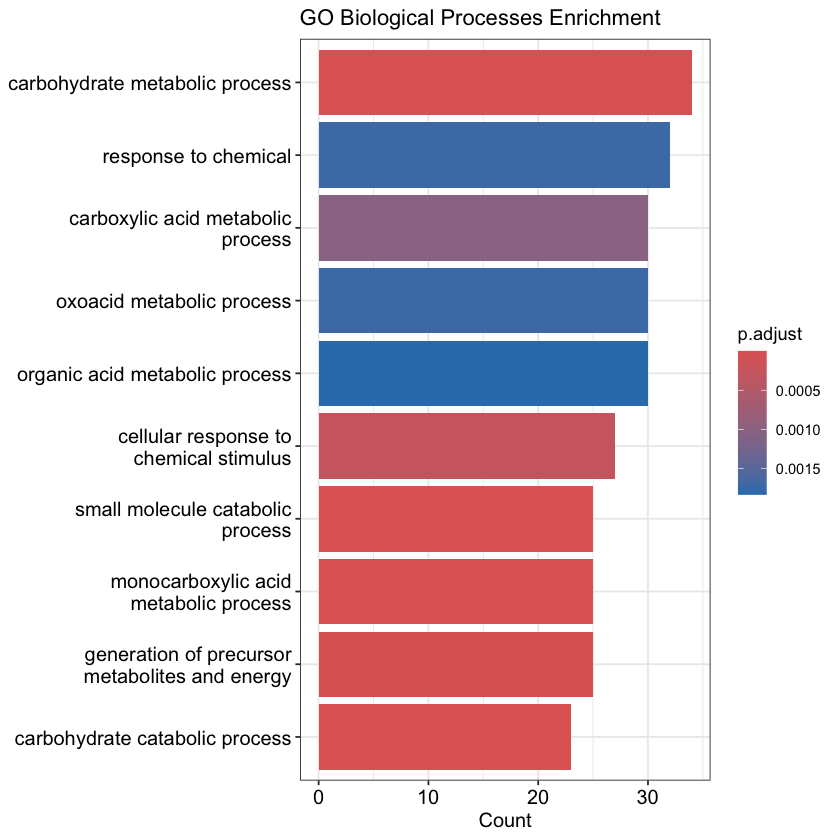

In [18]:
# Bar plot of top 10 enriched GO terms
barplot(
    ego_bp_up_sorted,
    showCategory = 10,
    orderBy = "Count",
    title = "GO Biological Processes Enrichment"
)

## Enrichment of Down Regulated Genes

In [19]:
# Perform GO enrichment analysis for Biological Processes
ego_bp_down <- enrichGO(
    gene          = down_gene_list,      # Your DEG list in SGD ORF IDs
    OrgDb         = org.Sc.sgd.db,      # OrgDb for S. cerevisiae
    keyType       = "ORF",              # Key type of gene identifiers
    ont           = "BP",               # Ontology: BP (Biological Process)
    pAdjustMethod = "BH",               # Multiple testing correction
    pvalueCutoff  = 0.05,               # P-value cutoff
    qvalueCutoff  = 0.2                 # Q-value cutoff
)
dim(ego_bp_down)
head(ego_bp_down)

[1] 65 12

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0042254,GO:0042254,ribosome biogenesis,110/246,480/6476,0.2291667,6.032859,22.76921,6.742894e-62,5.515687e-59,5.096208e-59,YPL220W/YAL059W/YIL019W/snR63/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YDR087C/YNL112W/YHR089C/YKR057W/YDL136W/YER131W/YFR031C-A/YPR102C/YDR447C/YKR094C/YBR189W/YER102W/YIL133C/YGL030W/YBR181C/YGL123W/YML026C/YPL211W/YOR096W/YKL078W/YGR103W/YGR145W/YDL208W/YDR091C/YNL075W/YPL266W/YKL143W/YOL077C/YER006W/YIL069C/YCL059C/YDR064W/YOR340C/YGR085C/YJL122W/YGR271C-A/YLR435W/YNL178W/YOR004W/YKL014C/YJL050W/YKL099C/YKR081C/YOR341W/YNL110C/snR46/YMR290C/YKL009W/snR49/YLR009W/YOR272W/YGL171W/YDL148C/YBL004W/YNL248C/YMR239C/YHR197W/YMR229C/YOR294W/YGR245C/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/snR61/YPL043W/snR128/YLR175W/YHR052W/YOR206W/snR17b/YJL033W/YDR101C/YNL002C/YAL025C/YLL008W/YDL229W/YDL014W/snR67/YNL061W/YDR449C/YHR088W/YJL148W/YDR060W/snR44/YPR112C/YLR196W/YPR010C/YDR324C/YMR049C/YHR170W/YCL054W/YMR131C/YGR128C/YPL012W/YGL078C/snR39B/snR72,110
GO:0016072,GO:0016072,rRNA metabolic process,97/246,423/6476,0.2293144,6.036749,21.29014,1.402211e-53,5.735043e-51,5.298881e-51,YPL220W/YIL019W/snR63/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YDR087C/YNL112W/YHR089C/YKR057W/YDL136W/YER131W/YBR189W/YER102W/YIL133C/YGL030W/YBR181C/YGL123W/YML026C/YPL211W/YOR096W/YKL078W/YGR103W/YGR145W/YDL208W/YDR091C/YNL075W/YPL266W/YOL077C/YER006W/YIL069C/YCL059C/YDR064W/YOR340C/YGR271C-A/YMR116C/YLR435W/YNL178W/YOR004W/YKL014C/YJL050W/YKL099C/YKR081C/YOR341W/YNL110C/snR46/YMR290C/YKL009W/snR49/YOR272W/YGL171W/YDL148C/YBL004W/YNL248C/YMR239C/YHR197W/YMR229C/YOR294W/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/snR61/YPL043W/snR128/YLR175W/YHR052W/snR17b/YJL033W/YNL002C/YAL025C/YLL008W/YDL229W/YDL014W/snR67/YNL061W/YDR449C/YHR088W/YJL148W/snR44/YPR112C/YLR196W/YPR010C/YDR324C/YMR049C/YCL054W/YMR131C/YGR128C/YPL012W/YGL078C/snR39B/snR72,97
GO:0006364,GO:0006364,rRNA processing,90/246,368/6476,0.2445652,6.438229,21.34398,7.581541e-52,2.067233e-49,1.910016e-49,YPL220W/YIL019W/snR63/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YDR087C/YNL112W/YHR089C/YKR057W/YDL136W/YER131W/YBR189W/YER102W/YIL133C/YGL030W/YBR181C/YGL123W/YML026C/YPL211W/YOR096W/YKL078W/YGR103W/YGR145W/YDL208W/YDR091C/YNL075W/YPL266W/YOL077C/YER006W/YIL069C/YCL059C/YDR064W/YGR271C-A/YLR435W/YOR004W/YKL014C/YJL050W/YKL099C/YKR081C/YNL110C/snR46/YMR290C/YKL009W/snR49/YOR272W/YGL171W/YDL148C/YBL004W/YMR239C/YHR197W/YMR229C/YOR294W/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/snR61/YPL043W/snR128/YLR175W/YHR052W/snR17b/YJL033W/YNL002C/YAL025C/YLL008W/YDL229W/YDL014W/snR67/YNL061W/YDR449C/YHR088W/snR44/YPR112C/YLR196W/YDR324C/YMR049C/YCL054W/YMR131C/YGR128C/YPL012W/YGL078C/snR39B/snR72,90
GO:0042273,GO:0042273,ribosomal large subunit biogenesis,42/246,132/6476,0.3181818,8.376201,17.01302,1.907809e-28,3.901468e-26,3.604754e-26,YPL220W/YLL045C/YGL076C/YDL136W/YER131W/YFR031C-A/YPR102C/YKR094C/YIL133C/YPL211W/YGR103W/YDL208W/YDR091C/YOL077C/YER006W/YGR085C/YJL122W/YLR435W/YKL014C/YKR081C/YNL110C/YMR290C/YKL009W/YLR009W/YOR272W/YHR197W/YMR229C/YOR294W/YGR245C/YHR066W/YPL043W/YHR052W/YOR206W/YNL002C/YAL025C/YLL008W/YNL061W/YHR088W/YDR060W/YMR049C/YCL054W/YGL078C,42
GO:0042274,GO:0042274,ribosomal small subunit biogenesis,40/246,145/6476,0.2758621,7.262125,15.15350,1.920962e-24,3.142694e-22,2.903685e-22,YIL019W/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YKR057W/YDR447C/YBR189W/YER102W/YBR181C/YML026C/YOR096W/YKL078W/YGR103W/YGR145W/YNL075W/YPL266W/YKL143W/YIL069C/YCL059C/YDR064W/YGR271C-A/YLR435W/YOR004W/YKL099C/YMR290C/YGL171W/YDL148C/YBL004W/YMR229C/YOR294W/YNL132W/snR128/snR17b/YDR449C/YPR112C/YDR324C/YGR128C/YPL012W,40
GO:0030490,GO:0030490,maturation of SSU-rRNA,36/246,121/6476,0.2975207,7.832292,15.07456,2.692803e-23,3.671188e-21,3.391987e-21,YIL019W/YDL083C/YBR048W/YER074W/YG

[1] 65 12

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0042254,GO:0042254,ribosome biogenesis,110/246,480/6476,0.2291667,6.032859,22.76921,6.742894e-62,5.515687e-59,5.096208e-59,YPL220W/YAL059W/YIL019W/snR63/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YDR087C/YNL112W/YHR089C/YKR057W/YDL136W/YER131W/YFR031C-A/YPR102C/YDR447C/YKR094C/YBR189W/YER102W/YIL133C/YGL030W/YBR181C/YGL123W/YML026C/YPL211W/YOR096W/YKL078W/YGR103W/YGR145W/YDL208W/YDR091C/YNL075W/YPL266W/YKL143W/YOL077C/YER006W/YIL069C/YCL059C/YDR064W/YOR340C/YGR085C/YJL122W/YGR271C-A/YLR435W/YNL178W/YOR004W/YKL014C/YJL050W/YKL099C/YKR081C/YOR341W/YNL110C/snR46/YMR290C/YKL009W/snR49/YLR009W/YOR272W/YGL171W/YDL148C/YBL004W/YNL248C/YMR239C/YHR197W/YMR229C/YOR294W/YGR245C/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/snR61/YPL043W/snR128/YLR175W/YHR052W/YOR206W/snR17b/YJL033W/YDR101C/YNL002C/YAL025C/YLL008W/YDL229W/YDL014W/snR67/YNL061W/YDR449C/YHR088W/YJL148W/YDR060W/snR44/YPR112C/YLR196W/YPR010C/YDR324C/YMR049C/YHR170W/YCL054W/YMR131C/YGR128C/YPL012W/YGL078C/snR39B/snR72,110
GO:0016072,GO:0016072,rRNA metabolic process,97/246,423/6476,0.2293144,6.036749,21.29014,1.402211e-53,5.735043e-51,5.298881e-51,YPL220W/YIL019W/snR63/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YDR087C/YNL112W/YHR089C/YKR057W/YDL136W/YER131W/YBR189W/YER102W/YIL133C/YGL030W/YBR181C/YGL123W/YML026C/YPL211W/YOR096W/YKL078W/YGR103W/YGR145W/YDL208W/YDR091C/YNL075W/YPL266W/YOL077C/YER006W/YIL069C/YCL059C/YDR064W/YOR340C/YGR271C-A/YMR116C/YLR435W/YNL178W/YOR004W/YKL014C/YJL050W/YKL099C/YKR081C/YOR341W/YNL110C/snR46/YMR290C/YKL009W/snR49/YOR272W/YGL171W/YDL148C/YBL004W/YNL248C/YMR239C/YHR197W/YMR229C/YOR294W/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/snR61/YPL043W/snR128/YLR175W/YHR052W/snR17b/YJL033W/YNL002C/YAL025C/YLL008W/YDL229W/YDL014W/snR67/YNL061W/YDR449C/YHR088W/YJL148W/snR44/YPR112C/YLR196W/YPR010C/YDR324C/YMR049C/YCL054W/YMR131C/YGR128C/YPL012W/YGL078C/snR39B/snR72,97
GO:0006364,GO:0006364,rRNA processing,90/246,368/6476,0.2445652,6.438229,21.34398,7.581541e-52,2.067233e-49,1.910016e-49,YPL220W/YIL019W/snR63/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YDR087C/YNL112W/YHR089C/YKR057W/YDL136W/YER131W/YBR189W/YER102W/YIL133C/YGL030W/YBR181C/YGL123W/YML026C/YPL211W/YOR096W/YKL078W/YGR103W/YGR145W/YDL208W/YDR091C/YNL075W/YPL266W/YOL077C/YER006W/YIL069C/YCL059C/YDR064W/YGR271C-A/YLR435W/YOR004W/YKL014C/YJL050W/YKL099C/YKR081C/YNL110C/snR46/YMR290C/YKL009W/snR49/YOR272W/YGL171W/YDL148C/YBL004W/YMR239C/YHR197W/YMR229C/YOR294W/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/snR61/YPL043W/snR128/YLR175W/YHR052W/snR17b/YJL033W/YNL002C/YAL025C/YLL008W/YDL229W/YDL014W/snR67/YNL061W/YDR449C/YHR088W/snR44/YPR112C/YLR196W/YDR324C/YMR049C/YCL054W/YMR131C/YGR128C/YPL012W/YGL078C/snR39B/snR72,90
GO:0042273,GO:0042273,ribosomal large subunit biogenesis,42/246,132/6476,0.3181818,8.376201,17.01302,1.907809e-28,3.901468e-26,3.604754e-26,YPL220W/YLL045C/YGL076C/YDL136W/YER131W/YFR031C-A/YPR102C/YKR094C/YIL133C/YPL211W/YGR103W/YDL208W/YDR091C/YOL077C/YER006W/YGR085C/YJL122W/YLR435W/YKL014C/YKR081C/YNL110C/YMR290C/YKL009W/YLR009W/YOR272W/YHR197W/YMR229C/YOR294W/YGR245C/YHR066W/YPL043W/YHR052W/YOR206W/YNL002C/YAL025C/YLL008W/YNL061W/YHR088W/YDR060W/YMR049C/YCL054W/YGL078C,42
GO:0042274,GO:0042274,ribosomal small subunit biogenesis,40/246,145/6476,0.2758621,7.262125,15.15350,1.920962e-24,3.142694e-22,2.903685e-22,YIL019W/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YKR057W/YDR447C/YBR189W/YER102W/YBR181C/YML026C/YOR096W/YKL078W/YGR103W/YGR145W/YNL075W/YPL266W/YKL143W/YIL069C/YCL059C/YDR064W/YGR271C-A/YLR435W/YOR004W/YKL099C/YMR290C/YGL171W/YDL148C/YBL004W/YMR229C/YOR294W/YNL132W/snR128/snR17b/YDR449C/YPR112C/YDR324C/YGR128C/YPL012W,40
GO:0030490,GO:0030490,maturation of SSU-rRNA,36/246,121/6476,0.2975207,7.832292,15.07456,2.692803e-23,3.671188e-21,3.391987e-21,YIL019W/YDL083C/YBR048W/YER074W/YG

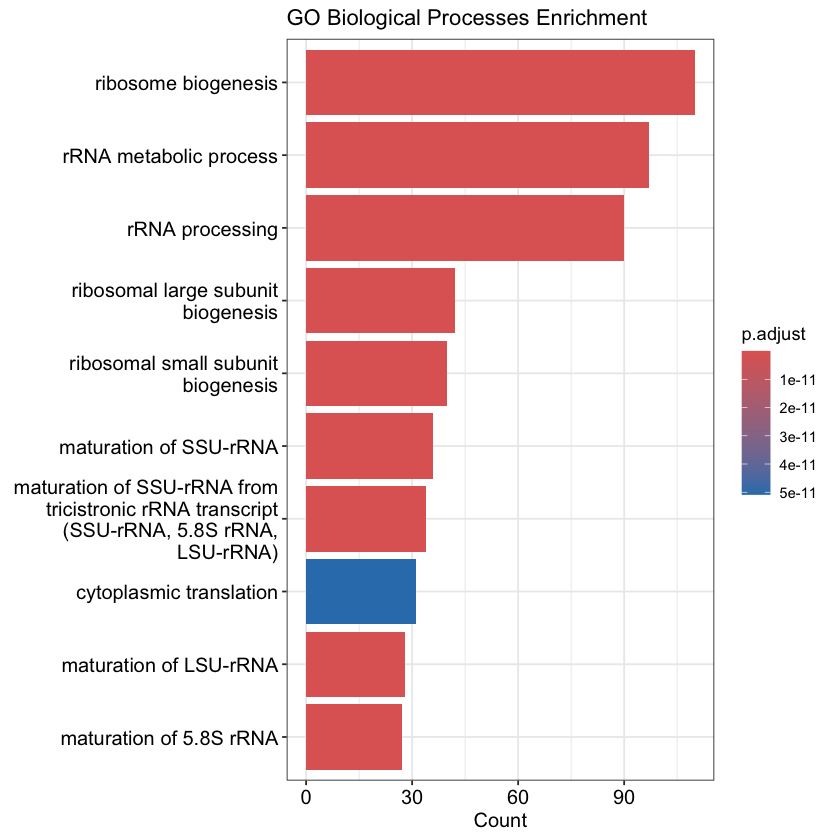

In [20]:
# sorting by Count
ego_bp_down_sorted <- ego_bp_down |> arrange(desc(Count))
dim(ego_bp_down_sorted)
head(ego_bp_down_sorted)

# Bar plot of top 10 enriched GO terms
barplot(
    ego_bp_down_sorted,
    showCategory = 10,
    orderBy = "Count",
    title = "GO Biological Processes Enrichment"
)

## Enrichment Analysis for Cellular Components

In [21]:
# Perform GO enrichment analysis for Cellular Components
ego_bp_down_cc <- enrichGO(
    gene          = down_gene_list,      # Your DEG list in SGD ORF IDs
    OrgDb         = org.Sc.sgd.db,      # OrgDb for S. cerevisiae
    keyType       = "ORF",              # Key type of gene identifiers
    ont           = "CC",               # Ontology: CC (Cellular Components)
    pAdjustMethod = "BH",               # Multiple testing correction
    pvalueCutoff  = 0.05,               # P-value cutoff
    qvalueCutoff  = 0.2                 # Q-value cutoff
)
dim(ego_bp_down_cc)
head(ego_bp_down_cc)

[1] 19 12

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0030684,GO:0030684,preribosome,67/246,172/6479,0.3895349,10.259335,24.44962,1.287672e-52,1.764111e-50,1.585870e-50,YAL059W/YBR048W/YGR214W/YDR087C/YBL028C/YDL136W/YER131W/YBR189W/YER102W/YBR181C/YGL123W/YPL211W/YOR096W/YNL175C/YGR103W/YGR145W/YJR145C/YNL075W/YPL266W/YKL143W/YOL077C/YER006W/YCL059C/YDR064W/YGR271C-A/YNL178W/YOR004W/YDR471W/YLR003C/YKL099C/YKR081C/YNL110C/YMR290C/YKL009W/YLR009W/YOR272W/YGL171W/YDL148C/YBL004W/YMR229C/YOR294W/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/YLR175W/YHR052W/YOR206W/snR17b/YJL033W/YDR101C/YNL002C/YAL025C/YLL008W/YDL014W/YNL061W/YDR449C/YHR088W/YDR060W/YPR112C/YDR324C/YMR049C/YCL054W/YGR128C/YPL012W/YGL078C,67
GO:0005730,GO:0005730,nucleolus,86/246,377/6479,0.2281167,6.008001,19.90391,1.211734e-46,8.300378e-45,7.461730e-45,YAL059W/YIL019W/snR63/YDR087C/YHR089C/YBL028C/YBR189W/YIL133C/YBR181C/YGL123W/YPL211W/YOR096W/YKL078W/YNL175C/YGR103W/YDL051W/YGR145W/YDL208W/YNL075W/YPL266W/YOL077C/YER006W/YCL059C/YDR064W/YOR340C/YGR271C-A/YOR004W/YKL014C/YJL050W/YKL099C/YIL127C/YKR081C/YOR341W/YNL110C/snR46/YMR290C/YKL009W/snR49/YKR092C/YLR009W/YOR272W/YGL171W/YDL148C/YBL004W/YNL248C/YMR239C/YMR229C/YOR294W/YGR245C/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/snR61/YPL043W/snR128/YLR175W/YHR052W/YOR206W/snR17b/YJL033W/YDR101C/YNL002C/YAL025C/YLL008W/YDL014W/snR67/YNL061W/YDR449C/YHR088W/YJL148W/YDR060W/snR44/YPR112C/YLR196W/YPR010C/YDR324C/YMR049C/YCL054W/YMR131C/YGR128C/YPL012W/YGL078C/snR39B/snR72,86
GO:0030686,GO:0030686,90S preribosome,36/246,94/6479,0.3829787,10.086663,17.62899,1.027241e-27,4.691068e-26,4.217095e-26,YBR048W/YGR214W/YER131W/YBR189W/YER102W/YOR096W/YGR103W/YGR145W/YJR145C/YNL075W/YPL266W/YCL059C/YDR064W/YNL178W/YLR003C/YMR290C/YOR272W/YGL171W/YDL148C/YBL004W/YMR229C/YLR409C/YLR197W/YNL132W/YLR175W/YHR052W/YOR206W/snR17b/YDL014W/YDR449C/YDR060W/YPR112C/YDR324C/YMR049C/YGR128C/YPL012W,36
GO:0030687,GO:0030687,"preribosome, large subunit precursor",30/246,62/6479,0.4838710,12.743902,18.45788,6.407547e-27,2.194585e-25,1.972850e-25,YAL059W/YDR087C/YBL028C/YDL136W/YPL211W/YGR103W/YOL077C/YER006W/YDR471W/YKR081C/YNL110C/YMR290C/YKL009W/YLR009W/YOR272W/YOR294W/YGL029W/YHR066W/YHR052W/YOR206W/YDR101C/YNL002C/YAL025C/YLL008W/YNL061W/YHR088W/YDR060W/YMR049C/YCL054W/YGL078C,30
GO:0022626,GO:0022626,cytosolic ribosome,44/246,179/6479,0.2458101,6.473997,14.75368,1.344614e-24,3.684243e-23,3.311997e-23,YLR333C/YPL220W/YNL301C/YGL147C/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YMR242C/YKR057W/YDL136W/YER131W/YFR031C-A/YPR102C/YDR447C/YJL190C/YDR382W/YKR094C/YBR189W/YER102W/YBR191W/YIL133C/YGL030W/YIL018W/YLR406C/YBR181C/YGL123W/YML026C/YOR096W/YDL208W/YJR145C/YDL082W/YIL069C/YDR064W/YGR085C/YMR116C/YNL178W/YDR471W/YHR052W/YNL002C/YJR047C,44
GO:0005840,GO:0005840,ribosome,46/246,278/6479,0.1654676,4.357987,11.36868,3.800133e-18,8.676970e-17,7.800273e-17,YLR333C/YPL220W/YNL301C/YGL147C/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YMR242C/YKR057W/YDL136W/YER131W/YFR031C-A/YPR102C/YDR447C/YJL190C/YDR382W/YKR094C/YBR189W/YER102W/YBR191W/YIL133C/YGL030W/YIL018W/YLR406C/YBR181C/YGL123W/YML026C/YOR096W/YKL081W/YDL208W/YJR145C/YDL082W/YIL069C/YDR064W/YGR085C/YMR116C/YNL178W/YDR471W/YHR052W/YNL002C/YJR047C/YPL012W,46


[1] 19 12

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0005730,GO:0005730,nucleolus,86/246,377/6479,0.2281167,6.008001,19.90391,1.211734e-46,8.300378e-45,7.461730e-45,YAL059W/YIL019W/snR63/YDR087C/YHR089C/YBL028C/YBR189W/YIL133C/YBR181C/YGL123W/YPL211W/YOR096W/YKL078W/YNL175C/YGR103W/YDL051W/YGR145W/YDL208W/YNL075W/YPL266W/YOL077C/YER006W/YCL059C/YDR064W/YOR340C/YGR271C-A/YOR004W/YKL014C/YJL050W/YKL099C/YIL127C/YKR081C/YOR341W/YNL110C/snR46/YMR290C/YKL009W/snR49/YKR092C/YLR009W/YOR272W/YGL171W/YDL148C/YBL004W/YNL248C/YMR239C/YMR229C/YOR294W/YGR245C/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/snR61/YPL043W/snR128/YLR175W/YHR052W/YOR206W/snR17b/YJL033W/YDR101C/YNL002C/YAL025C/YLL008W/YDL014W/snR67/YNL061W/YDR449C/YHR088W/YJL148W/YDR060W/snR44/YPR112C/YLR196W/YPR010C/YDR324C/YMR049C/YCL054W/YMR131C/YGR128C/YPL012W/YGL078C/snR39B/snR72,86
GO:0030684,GO:0030684,preribosome,67/246,172/6479,0.3895349,10.259335,24.44962,1.287672e-52,1.764111e-50,1.585870e-50,YAL059W/YBR048W/YGR214W/YDR087C/YBL028C/YDL136W/YER131W/YBR189W/YER102W/YBR181C/YGL123W/YPL211W/YOR096W/YNL175C/YGR103W/YGR145W/YJR145C/YNL075W/YPL266W/YKL143W/YOL077C/YER006W/YCL059C/YDR064W/YGR271C-A/YNL178W/YOR004W/YDR471W/YLR003C/YKL099C/YKR081C/YNL110C/YMR290C/YKL009W/YLR009W/YOR272W/YGL171W/YDL148C/YBL004W/YMR229C/YOR294W/YGL029W/YLR409C/YLR197W/YNL132W/YHR066W/YLR175W/YHR052W/YOR206W/snR17b/YJL033W/YDR101C/YNL002C/YAL025C/YLL008W/YDL014W/YNL061W/YDR449C/YHR088W/YDR060W/YPR112C/YDR324C/YMR049C/YCL054W/YGR128C/YPL012W/YGL078C,67
GO:0005840,GO:0005840,ribosome,46/246,278/6479,0.1654676,4.357987,11.36868,3.800133e-18,8.676970e-17,7.800273e-17,YLR333C/YPL220W/YNL301C/YGL147C/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YMR242C/YKR057W/YDL136W/YER131W/YFR031C-A/YPR102C/YDR447C/YJL190C/YDR382W/YKR094C/YBR189W/YER102W/YBR191W/YIL133C/YGL030W/YIL018W/YLR406C/YBR181C/YGL123W/YML026C/YOR096W/YKL081W/YDL208W/YJR145C/YDL082W/YIL069C/YDR064W/YGR085C/YMR116C/YNL178W/YDR471W/YHR052W/YNL002C/YJR047C/YPL012W,46
GO:0022626,GO:0022626,cytosolic ribosome,44/246,179/6479,0.2458101,6.473997,14.75368,1.344614e-24,3.684243e-23,3.311997e-23,YLR333C/YPL220W/YNL301C/YGL147C/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YMR242C/YKR057W/YDL136W/YER131W/YFR031C-A/YPR102C/YDR447C/YJL190C/YDR382W/YKR094C/YBR189W/YER102W/YBR191W/YIL133C/YGL030W/YIL018W/YLR406C/YBR181C/YGL123W/YML026C/YOR096W/YDL208W/YJR145C/YDL082W/YIL069C/YDR064W/YGR085C/YMR116C/YNL178W/YDR471W/YHR052W/YNL002C/YJR047C,44
GO:0044391,GO:0044391,ribosomal subunit,43/246,248/6479,0.1733871,4.566565,11.37723,9.004576e-18,1.762324e-16,1.584264e-16,YLR333C/YPL220W/YNL301C/YGL147C/YLL045C/YGL076C/YDL083C/YBR048W/YER074W/YGR214W/YOR369C/YMR242C/YKR057W/YDL136W/YER131W/YFR031C-A/YPR102C/YDR447C/YJL190C/YDR382W/YKR094C/YBR189W/YER102W/YBR191W/YIL133C/YGL030W/YIL018W/YLR406C/YBR181C/YGL123W/YML026C/YOR096W/YDL208W/YJR145C/YDL082W/YIL069C/YDR064W/YGR085C/YMR116C/YNL178W/YDR471W/YHR052W/YNL002C,43
GO:0030686,GO:0030686,90S preribosome,36/246,94/6479,0.3829787,10.086663,17.62899,1.027241e-27,4.691068e-26,4.217095e-26,YBR048W/YGR214W/YER131W/YBR189W/YER102W/YOR096W/YGR103W/YGR145W/YJR145C/YNL075W/YPL266W/YCL059C/YDR064W/YNL178W/YLR003C/YMR290C/YOR272W/YGL171W/YDL148C/YBL004W/YMR229C/YLR409C/YLR197W/YNL132W/YLR175W/YHR052W/YOR206W/snR17b/YDL014W/YDR449C/YDR060W/YPR112C/YDR324C/YMR049C/YGR128C/YPL012W,36


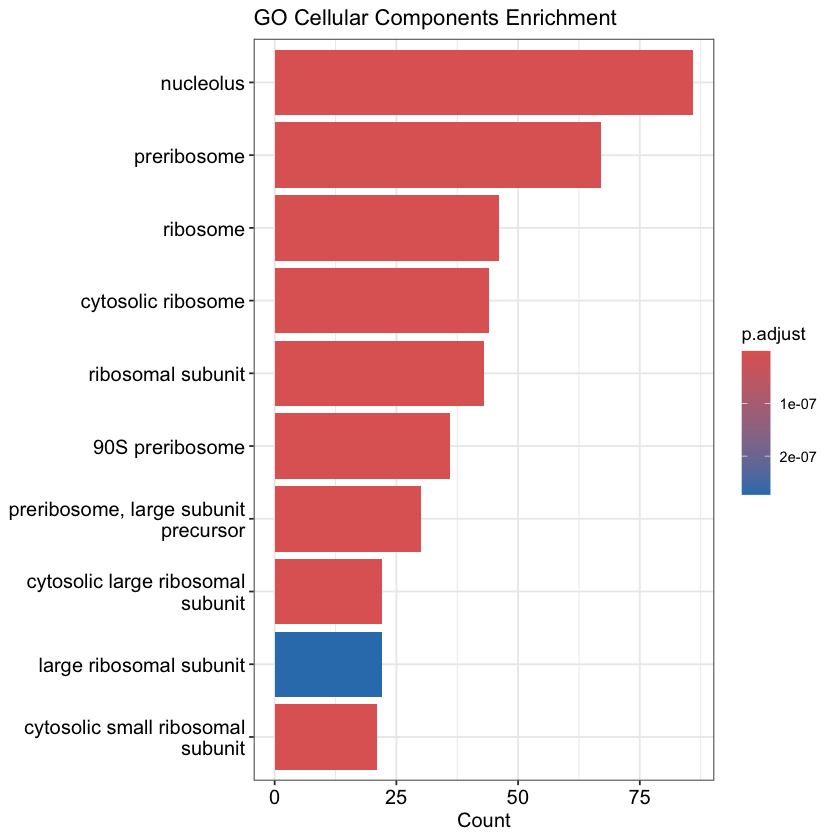

In [22]:
# sorting by Count
ego_bp_down_cc_sorted <- ego_bp_down_cc |> arrange(desc(Count))
dim(ego_bp_down_cc_sorted)
head(ego_bp_down_cc_sorted)

# Bar plot of top 10 enriched GO terms
barplot(
    ego_bp_down_cc_sorted,
    showCategory = 10,
    orderBy = "Count",
    title = "GO Cellular Components Enrichment"
)